# Cálculo de Temperatura de Melting e Conteúdo GC

**Nome:** Gabriel Pinheiro de Campos  
**RA:** 156315  
**Turma:** NB  

## Objetivos

Este notebook tem como objetivo analisar sequências de DNA da *E. coli* Sakai para:

1. Calcular o número de nucleotídeos (A, T, C, G e total) para cada sequência
2. Calcular o conteúdo GC de cada sequência
3. Calcular a temperatura de melting usando o conteúdo GC e [Na+] = 100 mM
4. Visualizar a relação entre conteúdo GC e temperatura de melting através de um gráfico

## Importação de Bibliotecas

In [1]:
# Importando as bibliotecas necessárias
from Bio import SeqIO
import matplotlib.pyplot as plt
import csv
import math
import os
import pandas as pd
import numpy as np

# Configuração para exibir gráficos no notebook
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

## Definição de Funções

In [2]:
def calcular_temperatura_melting(conteudo_gc, comprimento, concentracao_sodio=100):
    """
    Calcula a temperatura de melting de uma sequência de DNA.
    
    Fórmula: Tm = 81.5 + 16.6 * log10([Na+]/1000) + 0.41 * (%GC) - 500/comprimento
    
    Parâmetros:
    - conteudo_gc: proporção de G+C na sequência (0 a 1)
    - comprimento: comprimento da sequência em nucleotídeos
    - concentracao_sodio: concentração de Na+ em mM (padrão: 100 mM)
    
    Retorna:
    - Temperatura de melting em °C
    """
    return 81.5 + 16.6 * math.log10(concentracao_sodio/1000) + 0.41 * (conteudo_gc*100) - 500/comprimento

## Processamento do Arquivo FASTA

In [3]:
# Definindo os arquivos
arquivo_entrada = "Ecoli_Sakai_cds_from_genomic.fna"
arquivo_saida_dados = "Dados das sequencias.csv"
arquivo_saida_gc = "Conteudo_GC.csv"
arquivo_saida_temp = "Temperatura_x_GC.csv"
arquivo_grafico = "GC_x_Temperatura.png"

print(f"Processando arquivo: {arquivo_entrada}")

# Verificar se o arquivo existe
if not os.path.exists(arquivo_entrada):
    print(f"ERRO: O arquivo {arquivo_entrada} não foi encontrado!")
else:
    # Armazenar os dados de todas as sequências
    dados_sequencias = []
    
    # Ler o arquivo FASTA
    for registro in SeqIO.parse(arquivo_entrada, "fasta"):
        # Obter identificador e sequência
        identificador = registro.id
        sequencia = str(registro.seq).upper()
        
        # Contar nucleotídeos
        contador_A = sequencia.count("A")
        contador_T = sequencia.count("T")
        contador_C = sequencia.count("C")
        contador_G = sequencia.count("G")
        total = contador_A + contador_T + contador_C + contador_G
        
        # Calcular conteúdo GC
        conteudo_gc = (contador_G + contador_C) / total if total > 0 else 0
        
        # Calcular temperatura de melting
        temperatura_melting = calcular_temperatura_melting(conteudo_gc, total)
        
        # Armazenar os resultados
        dados_sequencias.append({
            "identificador": identificador,
            "contador_A": contador_A,
            "contador_T": contador_T,
            "contador_C": contador_C,
            "contador_G": contador_G,
            "total": total,
            "conteudo_gc": conteudo_gc,
            "temperatura_melting": temperatura_melting
        })
    
    print(f"Foram processadas {len(dados_sequencias)} sequências.")

Processando arquivo: Ecoli_Sakai_cds_from_genomic.fna
Foram processadas 5155 sequências.


## Criação dos Arquivos CSV

In [4]:
# Criar arquivo CSV com os dados das sequências
with open(arquivo_saida_dados, 'w', newline='') as arquivo:
    escritor = csv.writer(arquivo)
    escritor.writerow(["Sequencia", "A", "T", "C", "G", "Total"])
    for dados in dados_sequencias:
        escritor.writerow([
            dados["identificador"],
            dados["contador_A"], 
            dados["contador_T"], 
            dados["contador_C"], 
            dados["contador_G"], 
            dados["total"]
        ])

print(f"Arquivo criado: {arquivo_saida_dados}")

# Criar arquivo CSV com o conteúdo GC
with open(arquivo_saida_gc, 'w', newline='') as arquivo:
    escritor = csv.writer(arquivo)
    escritor.writerow(["Sequencia", "Conteudo GC"])
    for dados in dados_sequencias:
        escritor.writerow([
            dados["identificador"],
            f"{dados['conteudo_gc']:.3f}"  # 3 casas decimais
        ])

print(f"Arquivo criado: {arquivo_saida_gc}")

# Criar arquivo CSV com temperatura de melting e conteúdo GC
with open(arquivo_saida_temp, 'w', newline='') as arquivo:
    escritor = csv.writer(arquivo)
    escritor.writerow(["Temperatura de Melting", "Conteudo GC (%)"])
    for dados in dados_sequencias:
        escritor.writerow([
            f"{dados['temperatura_melting']:.3f}",  # 3 casas decimais
            f"{dados['conteudo_gc']*100:.2f}"       # 2 casas decimais
        ])

print(f"Arquivo criado: {arquivo_saida_temp}")

Arquivo criado: Dados das sequencias.csv
Arquivo criado: Conteudo_GC.csv
Arquivo criado: Temperatura_x_GC.csv


## Análise Exploratória dos Dados

In [5]:
# Converter para DataFrame para análise
df = pd.DataFrame(dados_sequencias)

# Exibir uma visão geral dos dados
print("Resumo dos dados:")
print(f"Total de sequências analisadas: {len(df)}")
print("\nEstatísticas básicas:")
print(df[["contador_A", "contador_T", "contador_C", "contador_G", "total", "conteudo_gc", "temperatura_melting"]].describe())

# Exibir as primeiras linhas para verificação
print("\nPrimeiras 5 sequências analisadas:")
df.head()

Resumo dos dados:
Total de sequências analisadas: 5155

Estatísticas básicas:
        contador_A   contador_T   contador_C   contador_G         total  \
count  5155.000000  5155.000000  5155.000000  5155.000000   5155.000000   
mean    225.509214   219.739670   223.478758   252.618041    921.345684   
std     176.467389   161.782122   183.461023   202.084365    706.726975   
min       8.000000    12.000000     7.000000     4.000000     45.000000   
25%     113.000000   106.000000   102.000000   119.000000    447.000000   
50%     188.000000   187.000000   184.000000   209.000000    768.000000   
75%     283.000000   288.000000   292.000000   329.000000   1201.500000   
max    3549.000000  2975.000000  4889.000000  4818.000000  15876.000000   

       conteudo_gc  temperatura_melting  
count  5155.000000          5155.000000  
mean      0.508016            84.832826  
std       0.054894             2.553045  
min       0.251852            68.366667  
25%       0.486935            83.701

,identificador,contador_A,contador_T,contador_C,contador_G,total,conteudo_gc,temperatura_melting
0,lcl|NC_002695.2_cds_NP_308028.1_1,27,14,31,12,84,0.511905,79.935714
1,lcl|NC_002695.2_cds_NP_308029.1_2,554,608,610,691,2463,0.528218,86.353918
2,lcl|NC_002695.2_cds_NP_308030.1_3,194,214,232,293,933,0.562701,87.434834
3,lcl|NC_002695.2_cds_NP_308031.1_4,302,301,316,368,1287,0.531469,86.301709
4,lcl|NC_002695.2_cds_NP_308032.1_5,77,60,83,77,297,0.538721,85.304040


## Visualização dos Dados

Gráfico salvo em: GC_x_Temperatura.png


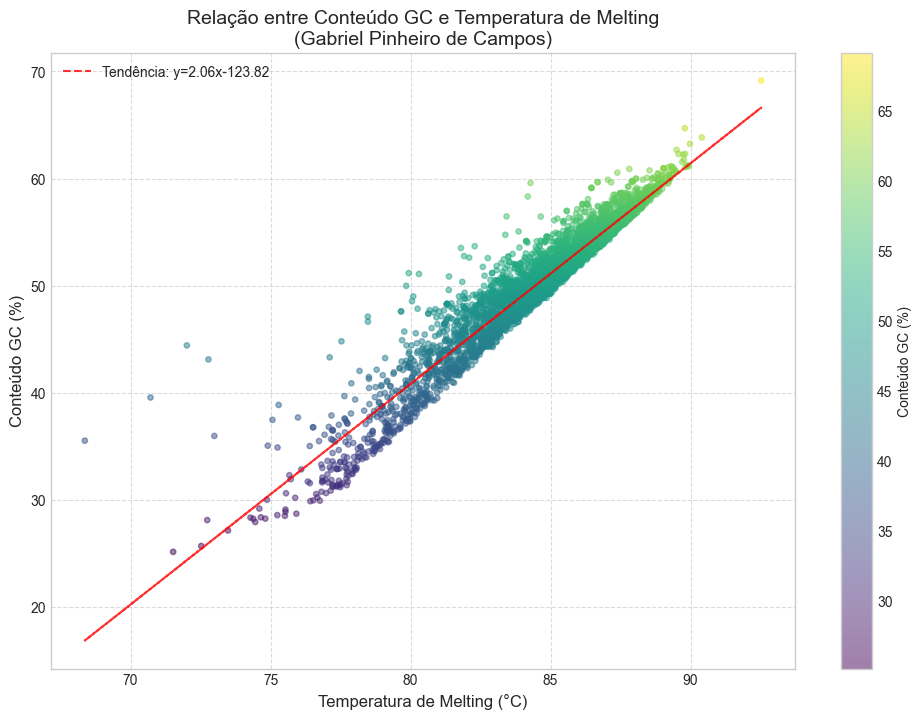

In [6]:
# Criar gráfico de dispersão
temperaturas = [dados["temperatura_melting"] for dados in dados_sequencias]
conteudos_gc = [dados["conteudo_gc"] * 100 for dados in dados_sequencias]

plt.figure(figsize=(12, 8))
scatter = plt.scatter(temperaturas, conteudos_gc, alpha=0.5, s=15, c=conteudos_gc, cmap='viridis')
plt.colorbar(scatter, label='Conteúdo GC (%)')
plt.xlabel('Temperatura de Melting (°C)', fontsize=12)
plt.ylabel('Conteúdo GC (%)', fontsize=12)
plt.title('Relação entre Conteúdo GC e Temperatura de Melting\n(Gabriel Pinheiro de Campos)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Adicionar linha de tendência
z = np.polyfit(temperaturas, conteudos_gc, 1)
p = np.poly1d(z)
plt.plot(temperaturas, p(temperaturas), "r--", alpha=0.8, label=f'Tendência: y={z[0]:.2f}x{z[1]:+.2f}')
plt.legend()

# Salvar o gráfico como arquivo de imagem
plt.savefig(arquivo_grafico, dpi=300, bbox_inches='tight')
print(f"Gráfico salvo em: {arquivo_grafico}")
plt.show()

## Análises adicionais

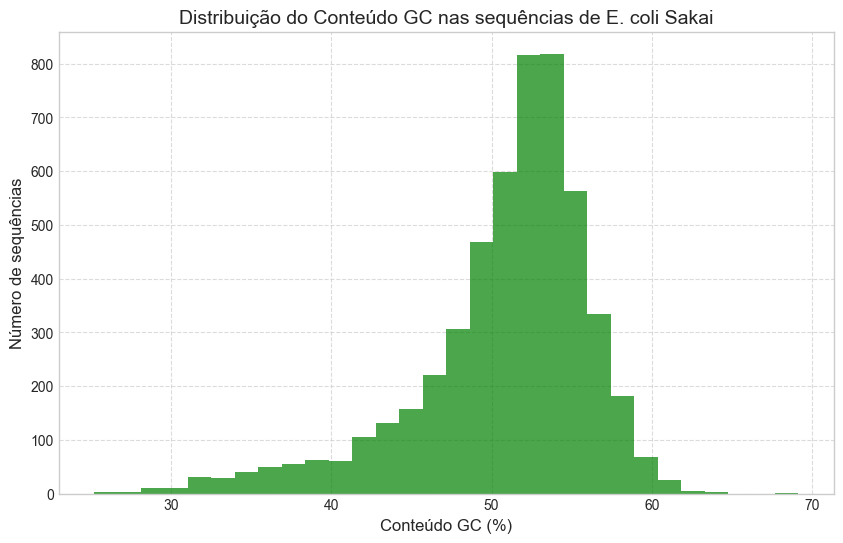

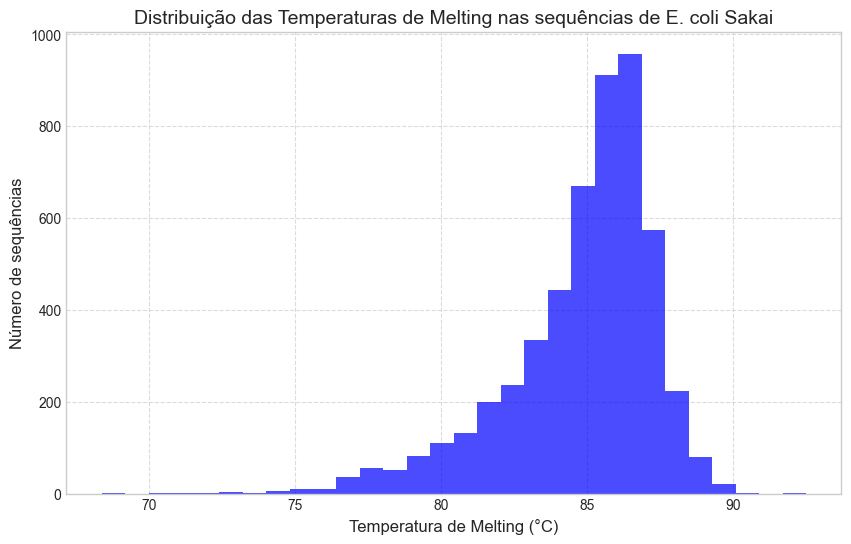

In [7]:
# Histograma do conteúdo GC
plt.figure(figsize=(10, 6))
plt.hist(conteudos_gc, bins=30, alpha=0.7, color='green')
plt.xlabel('Conteúdo GC (%)', fontsize=12)
plt.ylabel('Número de sequências', fontsize=12)
plt.title('Distribuição do Conteúdo GC nas sequências de E. coli Sakai', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Histograma das temperaturas de melting
plt.figure(figsize=(10, 6))
plt.hist(temperaturas, bins=30, alpha=0.7, color='blue')
plt.xlabel('Temperatura de Melting (°C)', fontsize=12)
plt.ylabel('Número de sequências', fontsize=12)
plt.title('Distribuição das Temperaturas de Melting nas sequências de E. coli Sakai', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()